<a href="https://colab.research.google.com/github/LakshyaMalhotra/time-series-analysis/blob/main/handling_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# library imports
import os
import gc
import io
import requests
import zipfile
import datetime

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# plot formatting
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['axes.labelsize'] = 14
sns.set_palette('Dark2')
colors = list(sns.color_palette('Dark2'))

In [3]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [4]:
# download the data and extract it from zip file
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip'
r = requests.get(file_url)
zf = zipfile.ZipFile(io.BytesIO(r.content))
zf.extractall()

In [5]:
# read the CSV file for the air quality data from Dingling station
base_dir = 'PRSA_Data_20130301-20170228'
file_name = 'PRSA_Data_Dingling_20130301-20170228.csv'
df = pd.read_csv(os.path.join(base_dir, file_name), encoding='ISO-8859-1')
df.head()

No  year  month  day  hour  PM2.5  ...    PRES  DEWP  RAIN   wd  WSPM   station
0   1  2013      3    1     0    4.0  ...  1020.8 -19.7   0.0    E   0.5  Dingling
1   2  2013      3    1     1    7.0  ...  1021.3 -19.0   0.0  ENE   0.7  Dingling
2   3  2013      3    1     2    5.0  ...  1021.3 -19.9   0.0  ENE   0.2  Dingling
3   4  2013      3    1     3    6.0  ...  1021.8 -19.1   0.0  NNE   1.0  Dingling
4   5  2013      3    1     4    5.0  ...  1022.3 -19.4   0.0    N   2.1  Dingling

[5 rows x 18 columns]

In [6]:
def convert_to_date(x):
    return datetime.datetime.strptime(x, '%Y %m %d %H')

In [7]:
del df
gc.collect()

115

In [8]:
# re-read the data with a new column containing the time stamp
df = pd.read_csv(os.path.join(base_dir, file_name), encoding='ISO-8859-1', 
                 parse_dates=[['year', 'month', 'day', 'hour']], 
                 date_parser=convert_to_date, keep_date_col=False)
df.head()

year_month_day_hour  No  PM2.5  PM10  SO2  ...  DEWP  RAIN   wd  WSPM   station
0 2013-03-01 00:00:00   1    4.0   4.0  3.0  ... -19.7   0.0    E   0.5  Dingling
1 2013-03-01 01:00:00   2    7.0   7.0  3.0  ... -19.0   0.0  ENE   0.7  Dingling
2 2013-03-01 02:00:00   3    5.0   5.0  3.0  ... -19.9   0.0  ENE   0.2  Dingling
3 2013-03-01 03:00:00   4    6.0   6.0  3.0  ... -19.1   0.0  NNE   1.0  Dingling
4 2013-03-01 04:00:00   5    5.0   5.0  3.0  ... -19.4   0.0    N   2.1  Dingling

[5 rows x 15 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   PM2.5                34285 non-null  float64       
 3   PM10                 34408 non-null  float64       
 4   SO2                  34334 non-null  float64       
 5   NO2                  33830 non-null  float64       
 6   CO                   33052 non-null  float64       
 7   O3                   33850 non-null  float64       
 8   TEMP                 35011 non-null  float64       
 9   PRES                 35014 non-null  float64       
 10  DEWP                 35011 non-null  float64       
 11  RAIN                 35013 non-null  float64       
 12  wd                   34924 non-null  object        
 13  WSPM                 35021 non-

In [10]:
def missing_values(df):
    data = pd.DataFrame(df.isnull().sum())
    data.columns = ['# missing']
    data['% missing'] = np.round((100 * data['# missing'])/df.shape[0], 2)
    return data

In [11]:
# printing basic info about the data
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')
print(f"\nFeatures:\n{'-'*10}\n{df.columns.tolist()}")
print(f'\nMissing values:\n{"-"*15}\n{missing_values(df)}')
print(f'\nUnique values:\n{"-"*15}\n{df.nunique()}')

Rows: 35064
Columns: 15

Features:
----------
['year_month_day_hour', 'No', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing values:
---------------
                     # missing  % missing
year_month_day_hour          0       0.00
No                           0       0.00
PM2.5                      779       2.22
PM10                       656       1.87
SO2                        730       2.08
NO2                       1234       3.52
CO                        2012       5.74
O3                        1214       3.46
TEMP                        53       0.15
PRES                        50       0.14
DEWP                        53       0.15
RAIN                        51       0.15
wd                         140       0.40
WSPM                        43       0.12
station                      0       0.00

Unique values:
---------------
year_month_day_hour    35064
No                     35064
PM2.5                    486


In [12]:
# filter out rows with nan values for `TEMP`
df.query('TEMP != TEMP').head(10)

year_month_day_hour     No  PM2.5   PM10  ...  RAIN   wd  WSPM   station
16748 2015-01-27 20:00:00  16749   39.0   43.0  ...   NaN  NaN   NaN  Dingling
16813 2015-01-30 13:00:00  16814   15.0   19.0  ...   NaN  NaN   NaN  Dingling
16829 2015-01-31 05:00:00  16830    5.0   11.0  ...   NaN  NaN   NaN  Dingling
16873 2015-02-02 01:00:00  16874   60.0   60.0  ...   NaN  NaN   NaN  Dingling
16883 2015-02-02 11:00:00  16884  138.0  138.0  ...   NaN  NaN   NaN  Dingling
16930 2015-02-04 10:00:00  16931    8.0    8.0  ...   NaN  NaN   NaN  Dingling
16933 2015-02-04 13:00:00  16934   13.0   16.0  ...   NaN  NaN   NaN  Dingling
17007 2015-02-07 15:00:00  17008    3.0   24.0  ...   NaN  NaN   NaN  Dingling
17030 2015-02-08 14:00:00  17031    4.0    5.0  ...   NaN  NaN   NaN  Dingling
17052 2015-02-09 12:00:00  17053   87.0   87.0  ...   NaN  NaN   NaN  Dingling

[10 rows x 15 columns]

In [13]:
# filtering out the rows with null values of `PM2.5`
df[df['PM2.5'].isnull()]

year_month_day_hour     No  PM2.5  PM10  ...  RAIN   wd  WSPM   station
752   2013-04-01 08:00:00    753    NaN   NaN  ...   0.0   NW   7.2  Dingling
753   2013-04-01 09:00:00    754    NaN   NaN  ...   0.0  NNW   4.5  Dingling
754   2013-04-01 10:00:00    755    NaN   NaN  ...   0.0  NNW   4.5  Dingling
755   2013-04-01 11:00:00    756    NaN   NaN  ...   0.0  NNE   4.0  Dingling
756   2013-04-01 12:00:00    757    NaN   NaN  ...   0.0   NE   5.0  Dingling
...                   ...    ...    ...   ...  ...   ...  ...   ...       ...
34863 2017-02-20 15:00:00  34864    NaN   NaN  ...   0.0  WNW   3.1  Dingling
34864 2017-02-20 16:00:00  34865    NaN   NaN  ...   0.0  WNW   3.4  Dingling
34866 2017-02-20 18:00:00  34867    NaN   NaN  ...   0.0   NE   1.1  Dingling
34883 2017-02-21 11:00:00  34884    NaN   NaN  ...   0.0  ESE   1.9  Dingling
34885 2017-02-21 13:00:00  34886    NaN   NaN  ...   0.0   SW   1.7  Dingling

[779 rows x 15 columns]

In [14]:
# checking out the missing values in `PM2.5` visually
fig = go.Figure()
trace = go.Scatter(x=df['year_month_day_hour'], y=df['PM2.5'], name='PM2.5', 
                   mode='lines', text=df['year_month_day_hour'])

fig.add_trace(trace)

layout = dict(
    title='PM2.5',
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(count=2,
                     label="2y",
                     step="year",
                     stepmode="backward"),
                dict(count=3,
                     label="3y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
                ]
            )
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    )
)
fig.update_layout(layout)
fig.show()

In [15]:
# checking out the missing values in `TEMP` visually
fig = go.Figure()
trace = go.Scatter(x=df['year_month_day_hour'], y=df['TEMP'], name='TEMP', 
                   mode='lines', text=df['year_month_day_hour'])

fig.add_trace(trace)

layout = dict(
    title='TEMP',
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(count=2,
                     label="2y",
                     step="year",
                     stepmode="backward"),
                dict(count=3,
                     label="3y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
                ]
            )
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    )
)
fig.update_layout(layout)
fig.show()

We can clearly see some missing values between Sept 22 and October 6, 2013 for `PM2.5` and between Jan 25 and Feb 22, 2015 for `TEMP`.

## Imputation techniques on the missing data

In [16]:
# setting the time stamp as index
df = df.set_index('year_month_day_hour')

In [17]:
df.loc['2015-02-02':'2015-02-04']

No  PM2.5  PM10   SO2  ...  RAIN   wd  WSPM   station
year_month_day_hour                            ...                           
2015-02-02 00:00:00  16873   67.0  67.0  32.0  ...   0.0   NW   1.3  Dingling
2015-02-02 01:00:00  16874   60.0  60.0  30.0  ...   NaN  NaN   NaN  Dingling
2015-02-02 02:00:00  16875   65.0  65.0  17.0  ...   0.0  NNW   0.1  Dingling
2015-02-02 03:00:00  16876   75.0  75.0  18.0  ...   0.0  NNW   2.3  Dingling
2015-02-02 04:00:00  16877   96.0  96.0  19.0  ...   0.0   NW   1.5  Dingling
...                    ...    ...   ...   ...  ...   ...  ...   ...       ...
2015-02-04 19:00:00  16940    4.0  20.0   2.0  ...   0.0  NNW   4.0  Dingling
2015-02-04 20:00:00  16941    5.0  12.0   3.0  ...   0.0  NNW   3.5  Dingling
2015-02-04 21:00:00  16942    5.0   7.0   3.0  ...   0.0    N   3.1  Dingling
2015-02-04 22:00:00  16943    5.0   5.0   3.0  ...   0.0  NNW   3.0  Dingling
2015-02-04 23:00:00  16944    6.0   6.0   3.0  ...   0.0  NNW   2.6  Dingling

[72 rows x 14 columns]

In [18]:
# creating another dataset without null values only for visualization
df_na = df.copy()
df_na = df_na.dropna()

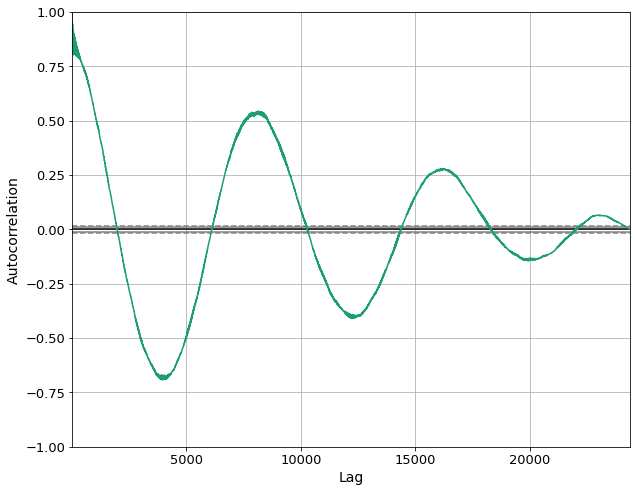

In [19]:
pd.plotting.autocorrelation_plot(df_na['2014':'2016']['TEMP']);

As the data is given at an hourly level, we can see that at around `x=8700`, there is a peak showing high correlation. This actually makes sense, because 8760 hours constitute an year and we can expect to have similar conditions after a period of 1 year. We can also observe that as the lag time increases, the autocorrelation decreases. This is becuase the larger is the lag time, the conditions might vary more frequently.

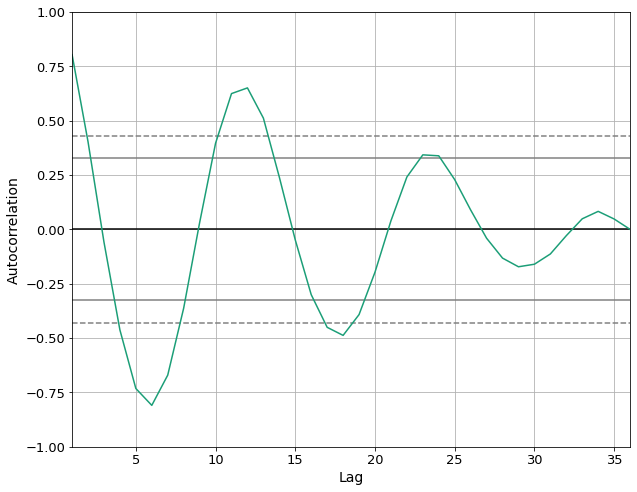

In [21]:
# Aggregating the data by taking the average over the months
pd.plotting.autocorrelation_plot(df_na['2014':'2016']['TEMP'].resample('1m').mean());

Again, after every 12 months we have a peak showing high auto-correlation. Dotted line represents 90% CL while the solid line represents 95% CL.

Next thing we can ask is what is the correlation across different time lags. Let's try to see this--

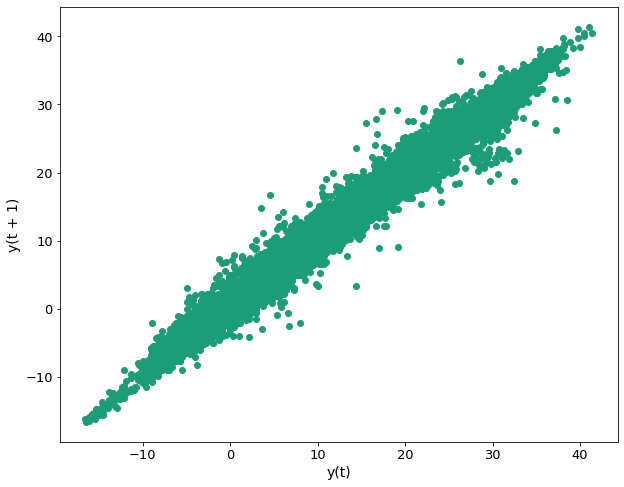

In [26]:
# lag of 1 hour
pd.plotting.lag_plot(df_na['TEMP'], lag=1, c=[colors[0]]);

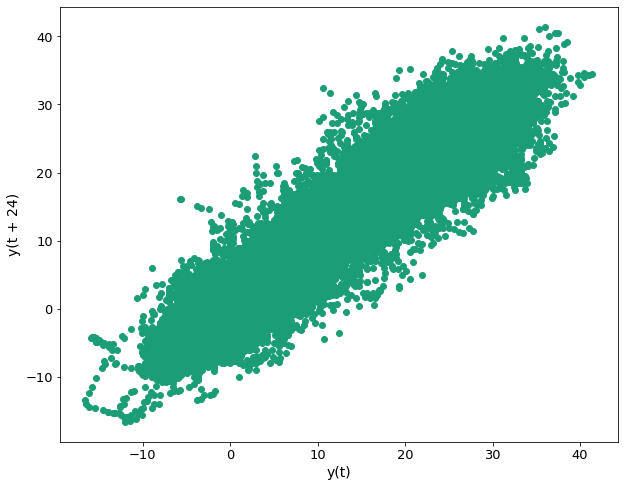

In [28]:
# lag of 24 hour
pd.plotting.lag_plot(df_na['TEMP'], lag=24, c=[colors[0]]);

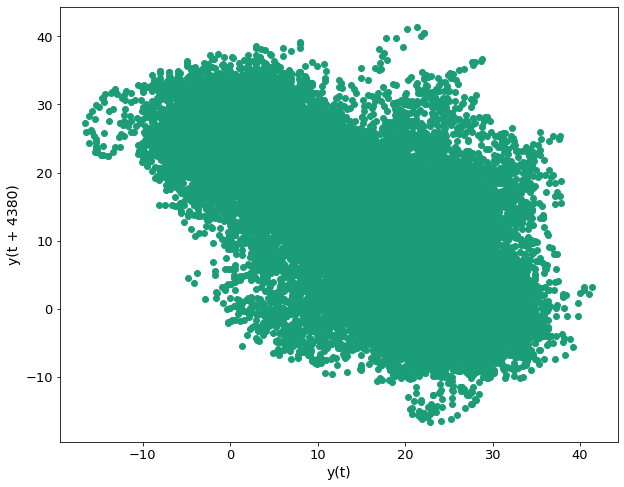

In [31]:
# lag of 6 months
pd.plotting.lag_plot(df_na['TEMP'], lag=4380, c=[colors[0]]);

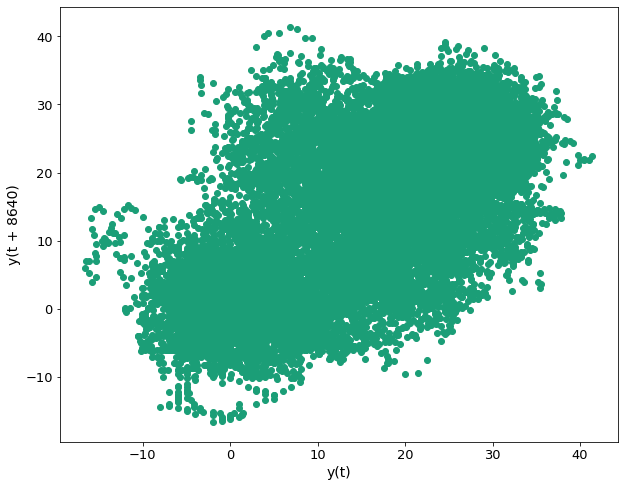

In [39]:
# lag of 1 year
pd.plotting.lag_plot(df_na['TEMP'], lag=8640, c=[colors[0]]);

The lag plots above suggest that we can impute our data with the data from the previous hour or by previous day since it showed the maximum autocorrelation.